In [1]:
import pandas as pd
import numpy as np
import datetime 

In [2]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir('../data/') if isfile(join('../data/', f))]

In [3]:
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('../data/data_append_wind.csv')

Unnamed: 0           TS_UTC_VON  ACTUAL_200525  EisMan_200525  \
0              NaN                  NaN            NaN            NaN   
1              NaN                  NaN            NaN            NaN   
2              NaN                  NaN            NaN            NaN   
3              NaN                  NaN            NaN            NaN   
4              NaN                  NaN            NaN            NaN   
...            ...                  ...            ...            ...   
173275    173275.0  2020-12-09 21:45:00            NaN            NaN   
173276    173276.0  2020-12-09 22:00:00            NaN            NaN   
173277    173277.0  2020-12-09 22:15:00            NaN            NaN   
173278    173278.0  2020-12-09 22:30:00            NaN            NaN   
173279    173279.0  2020-12-09 22:45:00            NaN            NaN   

        DA_C_200525  DA_E_200525  ACTUAL_200610  EisMan_200610  DA_C_200610  \
0               NaN          NaN            NaN            NaN          NaN   
1               NaN          NaN            NaN            NaN          NaN   
2               NaN          NaN            NaN            NaN          NaN   
3               NaN          NaN            NaN            NaN          NaN   
4               NaN          NaN            NaN            NaN          NaN   
...             ...          ...            ...            ...          ...   
173275          NaN          NaN            NaN            NaN          NaN   
173276          NaN          NaN            NaN            NaN          NaN   
173277          NaN          NaN            NaN            NaN          NaN   
173278          NaN          NaN            NaN            NaN          NaN   
173279          NaN          NaN            NaN            NaN          NaN   

        DA_E_200610  ...  DA_C_201848  DA_E_201848  ACTUAL_201338  \
0               NaN  ...          NaN          NaN            NaN   
1               NaN  ...          NaN          NaN            NaN   
2               NaN  ...          NaN          NaN            NaN   
3               NaN  ...          NaN          NaN            NaN   
4               NaN  ...          NaN          NaN            NaN   
...             ...  ...          ...          ...            ...   
173275          NaN  ...          NaN          NaN            NaN   
173276          NaN  ...          NaN          NaN            NaN   
173277          NaN  ...          NaN          NaN            NaN   
173278          NaN  ...          NaN          NaN            NaN   
173279          NaN  ...          NaN          NaN            NaN   

        EisMan_201338  DA_C_201338  DA_E_201338  ACTUAL_202092  EisMan_202092  \
0                 NaN          NaN          NaN            NaN            NaN   
1                 NaN          NaN          NaN            NaN            NaN   
2                 NaN          NaN          NaN            NaN            NaN   
3                 NaN          NaN          NaN            NaN            NaN   
4                 NaN          NaN          NaN            NaN            NaN   
...               ...          ...          ...            ...            ...   
173275            NaN          NaN          NaN            NaN            NaN   
173276            NaN          NaN          NaN            NaN            NaN   
173277            NaN          NaN          NaN            NaN            NaN   
173278            NaN          NaN          NaN            NaN            NaN   
173279            NaN          NaN          NaN            NaN            NaN   

        DA_C_202092  DA_E_202092  
0               NaN          NaN  
1               NaN          NaN  
2               NaN          NaN  
3               NaN          NaN  
4               NaN          NaN  
...             ...          ...  
173275          NaN          NaN  
173276          NaN          NaN  
173277          NaN          NaN  
173278          NaN          N

In [4]:
price = pd.read_csv('../data/Prices.csv',decimal=',',sep = ';', error_bad_lines=False)
price = price.dropna()
price['Unnamed: 0'] = price['Unnamed: 0'].apply(lambda x: x.replace(' (b)',''))
price['date'] = price['Unnamed: 0'].apply(lambda x: datetime.datetime.strptime(x, '%d.%m.%Y %H:%M'))
price = price.drop('Unnamed: 0', axis = 1)
price.columns = ['DA','ISP','Date']

In [5]:
def polt(y_test,pred,times,name):
    pos = list()
    neg = list()
    
    
    y_test_s = y_test
    pred_mixed_s = pred
    
    error =  (y_test_s - pred_mixed_s)
    
    for q in range(len(y_test_s)):
        if (y_test_s[q] - pred_mixed_s[q]) > 0:
            pos.append(y_test_s[q])
        else:
            pos.append(pred_mixed_s[q])
    for q in range(len(y_test_s)):
        if (y_test_s[q] - pred_mixed_s[q]) < 0:
            neg.append(y_test_s[q])
        else:
            neg.append(pred_mixed_s[q])
            
    error_pos = error[error > 0]
    error_neg = error[error < 0] 
    
    #print(error_pos.sum(),error_neg.sum())
    print('DA mean price:',price[price['Date'] > str(times.dt.year.min())]['DA'].mean())
    print('ISP mean price:',price[price['Date'] > str(times.dt.year.min())]['ISP'].mean())
    #imbalance = (np.round(imb_cost(y_true = y_test_s,y_pred = pred_mixed_s), 2))
    #revenue = (np.round(rev(y_test_s,pred_mixed_s, DA_test.values), 2))
    
    plt.figure(figsize = (30,10))
    plt.plot(times,y_test_s, label = 'ISP')
    plt.plot(times,pred_mixed_s, label = 'DA', color = 'green')
    plt.fill_between(times, (pos), (y_test_s), color='gold', alpha=0.3, label = 'DA > IPS')
    plt.fill_between(times, (neg), (y_test_s), color='red', alpha=0.3, label = 'DA < ISP')
    plt.axhline(y=price[price['Date'] > str(times.dt.year.min())]['DA'].mean(), color = 'red', label = 'DA_mean')
    plt.axhline(y=price[price['Date'] > str(times.dt.year.min())]['ISP'].mean(), color = 'gold', label = 'ISP_mean')
    plt.xlabel('Time')
    plt.ylabel('Price per MWh in €')
    plt.title(name)
    plt.legend()
#loss_function = mean_absolute_percentage_error    

In [6]:
print(price['DA'].mean())
print(price['ISP'].mean())

34.94082460362401
34.85545524254436


In [7]:
price['DA_10'] = price['DA'].rolling(960).mean()

In [8]:
price['ISP_10'] = price['ISP'].rolling(960).mean()


In [11]:
polt(price[price['Date'] > '2020']['ISP'].dropna().reset_index(drop = True)
     ,price[price['Date'] > '2020']['DA'].dropna().reset_index(drop = True)
     ,price[price['Date'] > '2020']['Date'].dropna().reset_index(drop = True)
     ,'Market ISP and DA')

DA mean price: 28.326553278688525
ISP mean price: 30.424460040983604


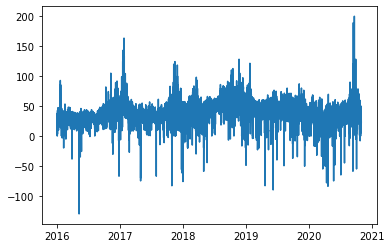

In [49]:
plt.plot(price['Date'], price['DA'])

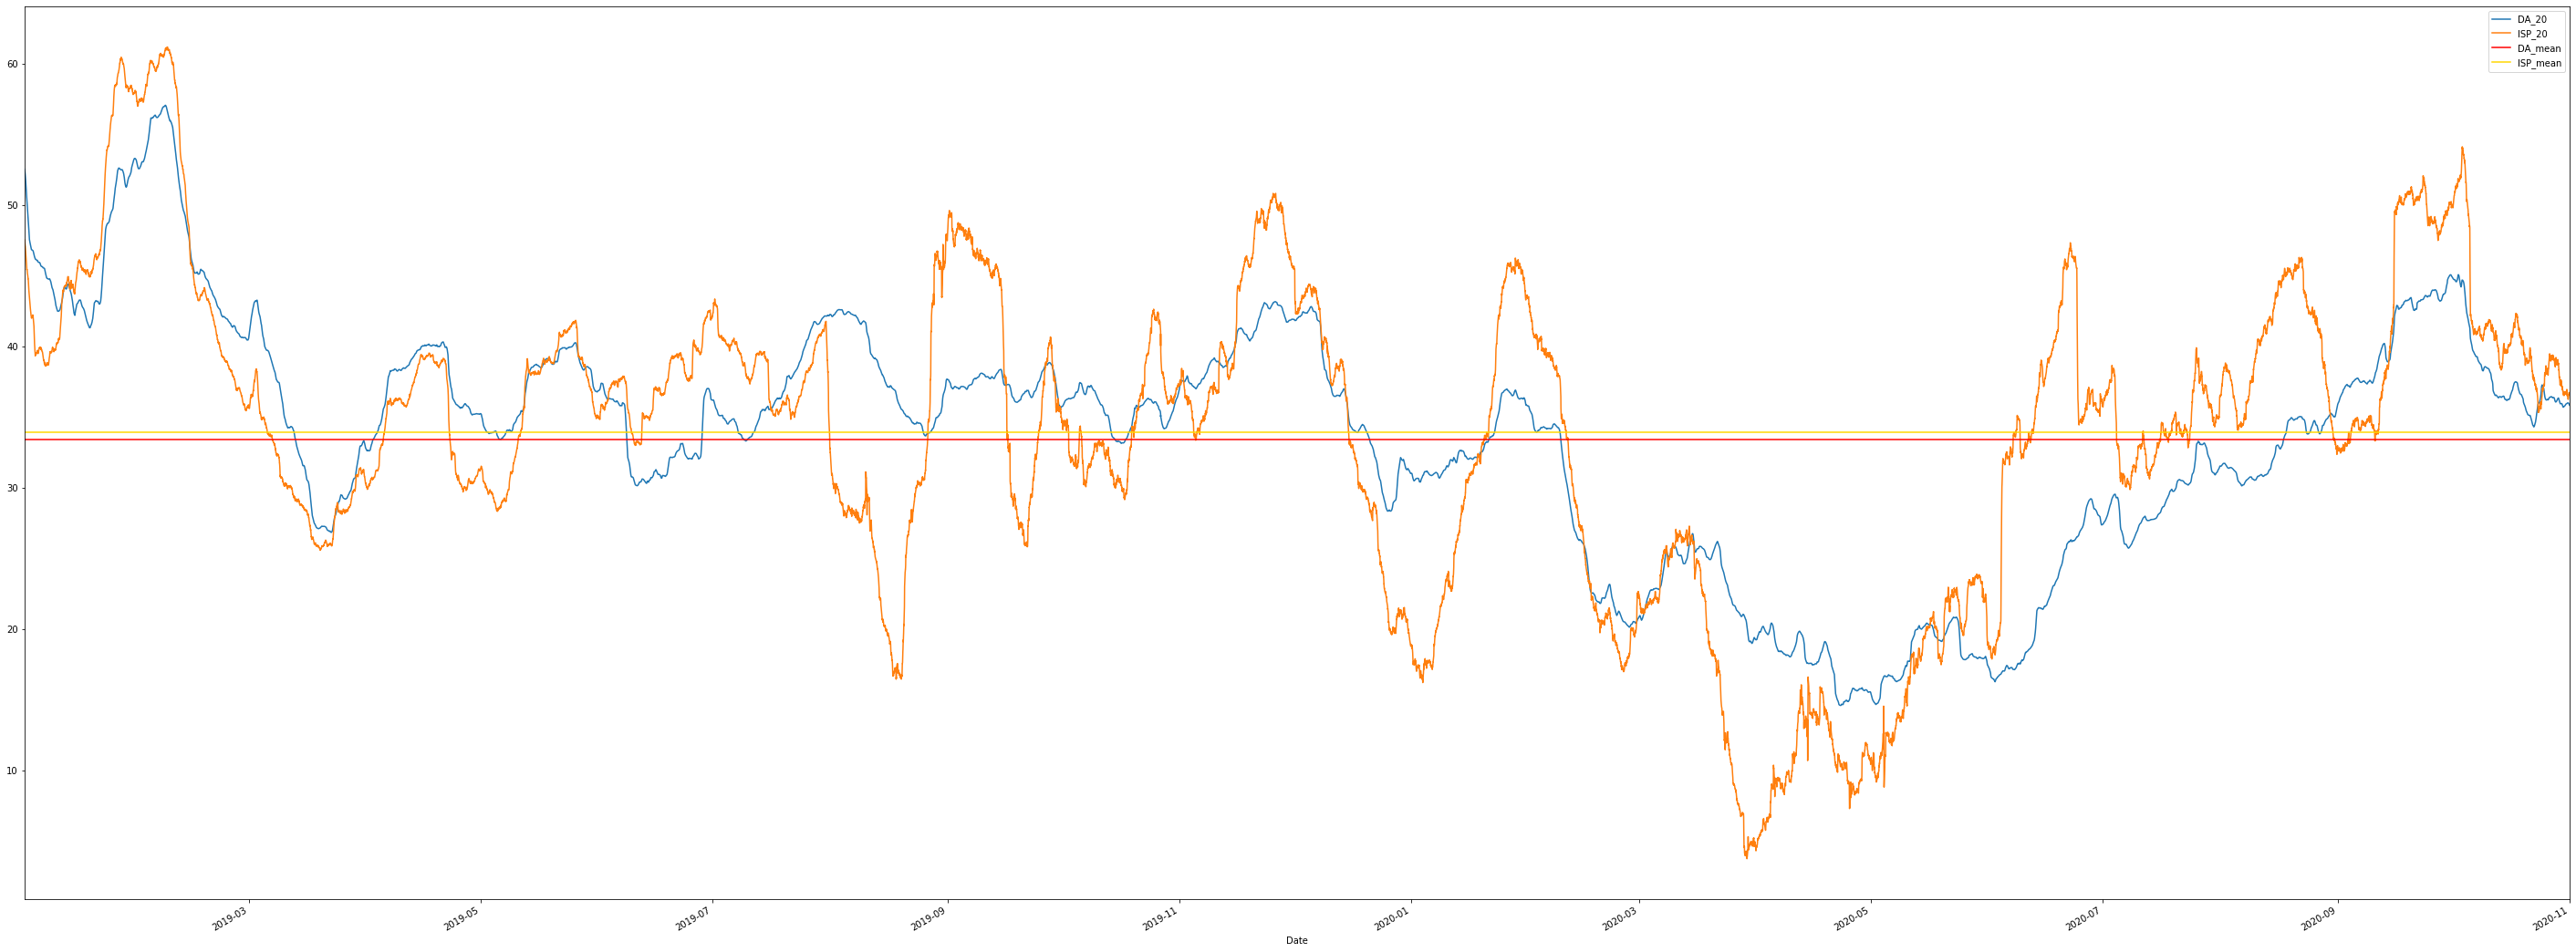

In [30]:
price[price['Date'] > '2019'][['Date','DA_20','ISP_20']].plot(x = "Date", figsize = (50,20)).
plt.axhline(y=price[price['Date'] > '2019']['DA'].mean(), color = 'red', label = 'DA_mean')
plt.axhline(y=price[price['Date'] > '2019']['ISP'].mean(), color = 'gold', label = 'ISP_mean')
plt.legend()

In [5]:
current = onlyfiles[-4:]

In [3]:
onlyfiles


['AES_wind farm_historical data_2017_2018 - 20172018.csv',
 'Data_EIU.csv',
 'drive-download-20201120T103210Z-001.zip',
 'EVN.csv',
 'Imbalance_201901010000-2020.csv',
 'Imbalance_202001010000-2019.csv',
 'Issaccea.csv',
 'Pgb - solar - forecasts.csv',
 'PGB_Export_Forecasts.csv',
 'pgb_nov.csv',
 'Ucea1.csv']

In [17]:
Issaccea = pd.read_csv('../data/Issaccea.csv', parse_dates = True)
Pgb = pd.read_csv('../data/Pgb - solar - forecasts.csv', parse_dates = True)
EVN = pd.read_csv('../data/EVN.csv', parse_dates = True)
Ucea1 = pd.read_csv('../data/Ucea1.csv', parse_dates = True)

In [22]:
Issaccea.columns

Index(['Parc', 'Date ', 'RPM', 'Real production', 'Tokwise', 'Excedent RPM',
       'Excedent Tokwise', 'Deficit RPM', 'Deficit Tokwise'],
      dtype='object')

In [49]:
Issaccea

Parc_Issaccea    Date _Issaccea  RPM_Issaccea  Real production_Issaccea  \
0          Isaccea    20.8.2020 0:00           0.0                       0.0   
1          Isaccea    20.8.2020 1:00           0.0                       0.0   
2          Isaccea    20.8.2020 2:00           0.0                       0.0   
3          Isaccea    20.8.2020 3:00           0.0                       0.0   
4          Isaccea    20.8.2020 4:00           0.0                       0.0   
...            ...               ...           ...                       ...   
1267       Isaccea  11.10.2020 19:00           0.0                       0.0   
1268       Isaccea  11.10.2020 20:00           0.0                       0.0   
1269       Isaccea  11.10.2020 21:00           0.0                       0.0   
1270       Isaccea  11.10.2020 22:00           0.0                       0.0   
1271       Isaccea  11.10.2020 23:00           0.0                       0.0   

      Tokwise_Issaccea  Excedent RPM_Issaccea  Excedent Tokwise_Issaccea  \
0                  0.0                    0.0                        0.0   
1                  0.0                    0.0                        0.0   
2                  0.0                    0.0                        0.0   
3                  0.0                    0.0                        0.0   
4                  0.0                    0.0                        0.0   
...                ...                    ...                        ...   
1267               0.0                    0.0                        0.0   
1268               0.0                    0.0                        0.0   
1269               0.0                    0.0                        0.0   
1270               0.0                    0.0                        0.0   
1271               0.0                    0.0                        0.0   

      Deficit RPM_Issaccea  Deficit Tokwise_Issaccea       Date_Issaccea  
0                      0.0                       0.0 2020-08-20 00:00:00  
1                      0.0                       0.0 2020-08-20 01:00:00  
2                      0.0                       0.0 2020-08-20 02:00:00  
3                      0.0                       0.0 2020-08-20 03:00:00  
4                      0.0                       0.0 2020-08-20 04:00:00  
...                    ...                       ...                 ...  
1267                   0.0                       0.0 2020-10-11 19:00:00  
1268                   0.0                       0.0 2020-10-11 20:00:00  
1269                   0.0                       0.0 2020-10-11 21:00:00  
1270                   0.0                       0.0 2020-10-11 22:00:00  
1271                   0.0                       0.0 2020-10-11 23:00:00  

[1272 rows x 10 columns]

In [23]:
Issaccea['Date'] = Issaccea['Date '].apply(lambda x: datetime.datetime.strptime(x , '%d.%m.%Y %H:%M'))

In [47]:
Ucea1['Date'] = Ucea1['Date '].apply(lambda x: datetime.datetime.strptime(x , '%d.%m.%Y %H:%M'))

KeyError: 'Date '

In [48]:
EVN['Date'] = EVN['Timestamp'].apply(lambda x: x.replace('.','/')).apply(lambda x: datetime.datetime.strptime(x , '%m/%d/%Y %H:%M'))

In [39]:
Pgb['Date'] = Pgb['Period End'].apply(lambda x: datetime.datetime.strptime(x , '%d.%m.%Y %H:%M'))

In [45]:
Issaccea.columns = [x + '_Issaccea' for x in Issaccea.columns]
Ucea1.columns = [x + '_Ucea1'  for x in Ucea1.columns]

In [61]:
Issaccea[['Real production_Issaccea', 'Tokwise_Issaccea', 'Date_Issaccea']].merge(
right = Ucea1[['Real production_Ucea1', 'Tokwise_Ucea1', 'Date_Ucea1']], left_on = 'Date_Issaccea', right_on = 'Date_Ucea1' ).merge(
right = EVN, left_on = 'Date_Issaccea', right_on = 'Date').to_csv('../data/Data_EIU.csv')

In [73]:
data = pd.read_csv('../data/Data_EIU.csv')

In [74]:
data

Issaccea  Ucea1  Pgb  EVN  Tokwise_Issaccea  Tokwise_Ucea1  Tokwise_EVN  \
0          0.0    0.0  0.0  0.0               0.0            0.0            0   
1          0.0    0.0  0.0  0.0               0.0            0.0            0   
2          0.0    0.0  0.0  0.0               0.0            0.0            0   
3          0.0    0.0  0.0  0.0               0.0            0.0            0   
4          0.0    0.0  0.0  0.0               0.0            0.0            0   
...        ...    ...  ...  ...               ...            ...          ...   
2031       0.0    0.0  0.0  0.0               0.0            0.0            0   
2032       0.0    0.0  0.0  0.0               0.0            0.0            0   
2033       0.0    0.0  0.0  0.0               0.0            0.0            0   
2034       0.0    0.0  0.0  0.0               0.0            0.0            0   
2035       0.0    0.0  0.0  0.0               0.0            0.0            0   

      Tokwise_PGB              Date  
0               0    20.8.2020 0:00  
1               0    20.8.2020 1:00  
2               0    20.8.2020 2:00  
3               0    20.8.2020 3:00  
4               0    20.8.2020 4:00  
...           ...               ...  
2031            0  22.11.2020 20:00  
2032            0  22.11.2020 21:00  
2033            0  22.11.2020 22:00  
2034            0  22.11.2020 23:00  
2035            0  23.11.2020 00:00  

[2036 rows x 9 columns]

In [75]:
data['Date'] = data['Date'].apply(lambda x: datetime.datetime.strptime(x , '%d.%m.%Y %H:%M'))

In [79]:
data_d = data.set_index('Date')

In [81]:
from sklearn.preprocessing import MinMaxScaler

In [84]:
sc = MinMaxScaler()

In [333]:
scaled_data = sc.fit_transform(data_d[:'2020-10-10'][['Issaccea', 'Ucea1', 'EVN','Tokwise_Issaccea', 'Tokwise_Ucea1', 'Tokwise_EVN']])

In [198]:
var_list = list(data[['Issaccea', 'Ucea1', 'EVN','Tokwise_Issaccea', 'Tokwise_Ucea1', 'Tokwise_EVN']].columns)

In [352]:
scaled_data = sc.fit_transform(data_d['2020-10-10':][['Pgb','Tokwise_PGB']].dropna())

In [353]:
data[['Issaccea', 'Ucea1', 'EVN','Tokwise_Issaccea', 'Tokwise_Ucea1', 'Tokwise_EVN']].columns

Index(['Issaccea', 'Ucea1', 'EVN', 'Tokwise_Issaccea', 'Tokwise_Ucea1',
       'Tokwise_EVN'],
      dtype='object')

In [354]:
scaled_data

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [355]:
labels

array([0., 0., 0., ..., 0., 0., 0.])

In [356]:
scaled_data[:,2]

IndexError: index 2 is out of bounds for axis 1 with size 2

In [357]:
features = scaled_data[:,3:]
labels = scaled_data[:,:3]

In [358]:
import tensorflow as tf
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.layers import Dropout
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Restrict TensorFlow to only use the fourth GPU
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')

        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [359]:
scaled_data[:,5]

IndexError: index 5 is out of bounds for axis 1 with size 2

In [360]:
k = 2

In [361]:
scaled_data

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [362]:
features = scaled_data[:,1]
labels = scaled_data[:,0]

In [363]:
X_train = features[:800].reshape(-1,1)
Y_train = labels[:800].reshape(-1,1)
X_test = features[800:].reshape(-1,1)
Y_test = labels[800:].reshape(-1,1)

In [364]:
model = Sequential([
Dense(units = 64
             , activation= 'relu'
             , input_shape=[X_train.shape[1]]
             , kernel_initializer = 'GlorotNormal'),
Dense(64),   
Dense(Y_train.shape[1])])
optimizer = tf.keras.optimizers.Adam(0.001)

model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])

In [365]:
epochs = 300

In [366]:
patience = 50

In [367]:
early_stop = EarlyStopping(patience=patience)

In [368]:
with tf.device('GPU'):
    model.fit(X_train, Y_train, 
            epochs=50, validation_split = 0.15, verbose = 1)

Epoch 1/50
22/22 [==============================] - 0s 6ms/step - loss: 0.0177 - mae: 0.0788 - mse: 0.0177 - val_loss: 0.0164 - val_mae: 0.0746 - val_mse: 0.0164
Epoch 2/50
22/22 [==============================] - 0s 2ms/step - loss: 0.0136 - mae: 0.0549 - mse: 0.0136 - val_loss: 0.0183 - val_mae: 0.0821 - val_mse: 0.0183
Epoch 3/50
22/22 [==============================] - 0s 2ms/step - loss: 0.0136 - mae: 0.0594 - mse: 0.0136 - val_loss: 0.0153 - val_mae: 0.0677 - val_mse: 0.0153
Epoch 4/50
22/22 [==============================] - 0s 2ms/step - loss: 0.0138 - mae: 0.0569 - mse: 0.0138 - val_loss: 0.0158 - val_mae: 0.0765 - val_mse: 0.0158
Epoch 5/50
22/22 [==============================] - 0s 2ms/step - loss: 0.0136 - mae: 0.0630 - mse: 0.0136 - val_loss: 0.0147 - val_mae: 0.0658 - val_mse: 0.0147
Epoch 6/50
22/22 [==============================] - 0s 2ms/step - loss: 0.0137 - mae: 0.0579 - mse: 0.0137 - val_loss: 0.0183 - val_mae: 0.0809 - val_mse: 0.0183
Epoch 7/50
22/22 [==========

In [369]:
pred = model.predict(X_test)

In [370]:
Y_train

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.02392344],
       [0.1076555 ],
       [0.33253589],
       [0.17464115],
       [0.20095694],
       [0.55263158],
       [0.65550239],
       [0.30143541],
       [0.20813397],
       [0.13636364],
       [0.01196172],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.00956938],
       [0.05023923],
       [0.06698565],
       [0.20095694],
       [0.24401914],
       [0.27033493],
       [0.31818182],
       [0.25837321],
       [0.1507177 ],
       [0.06937799],
       [0.0215311 ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.   

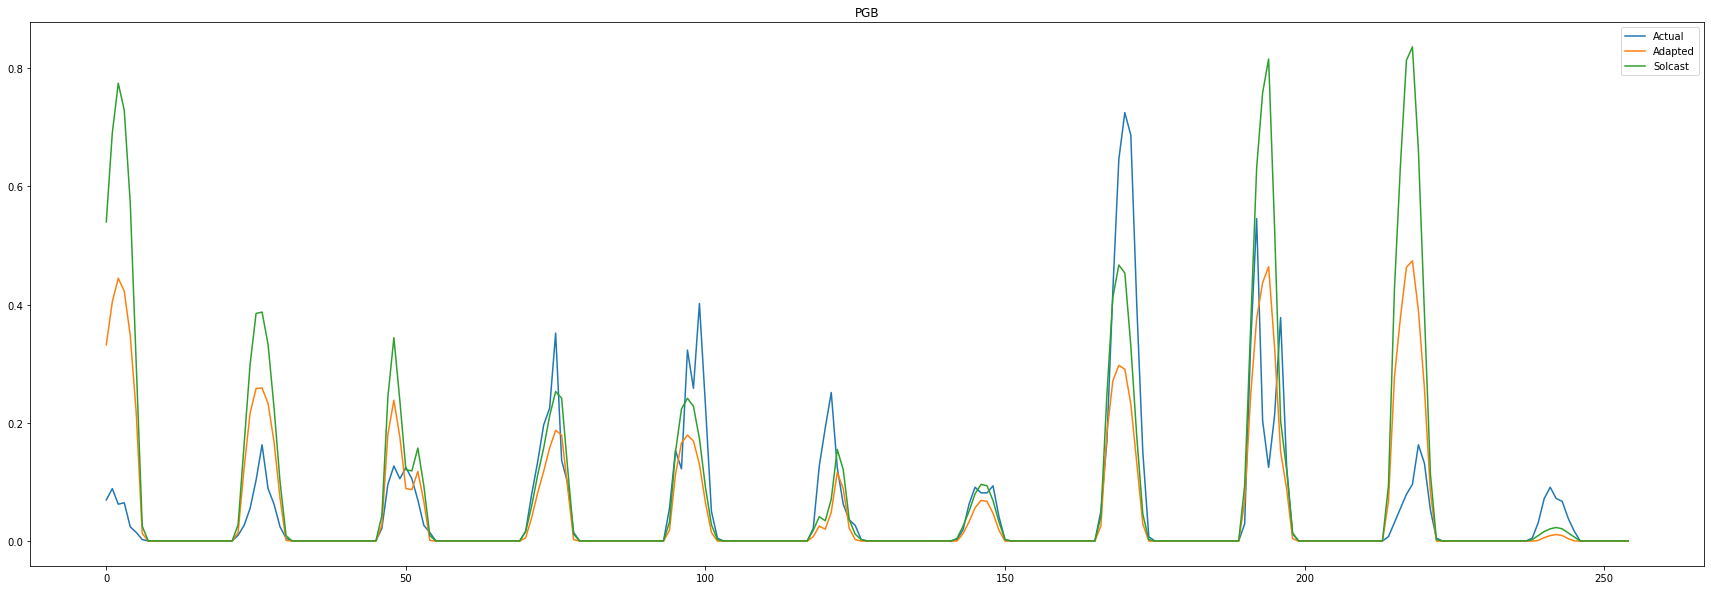

In [371]:
plt.figure(figsize = (30,10))
plt.plot(Y_test, label = 'Actual')
plt.plot(pred, label = 'Adapted')
plt.plot(X_test, label = 'Solcast')
plt.title('PGB')
plt.legend()

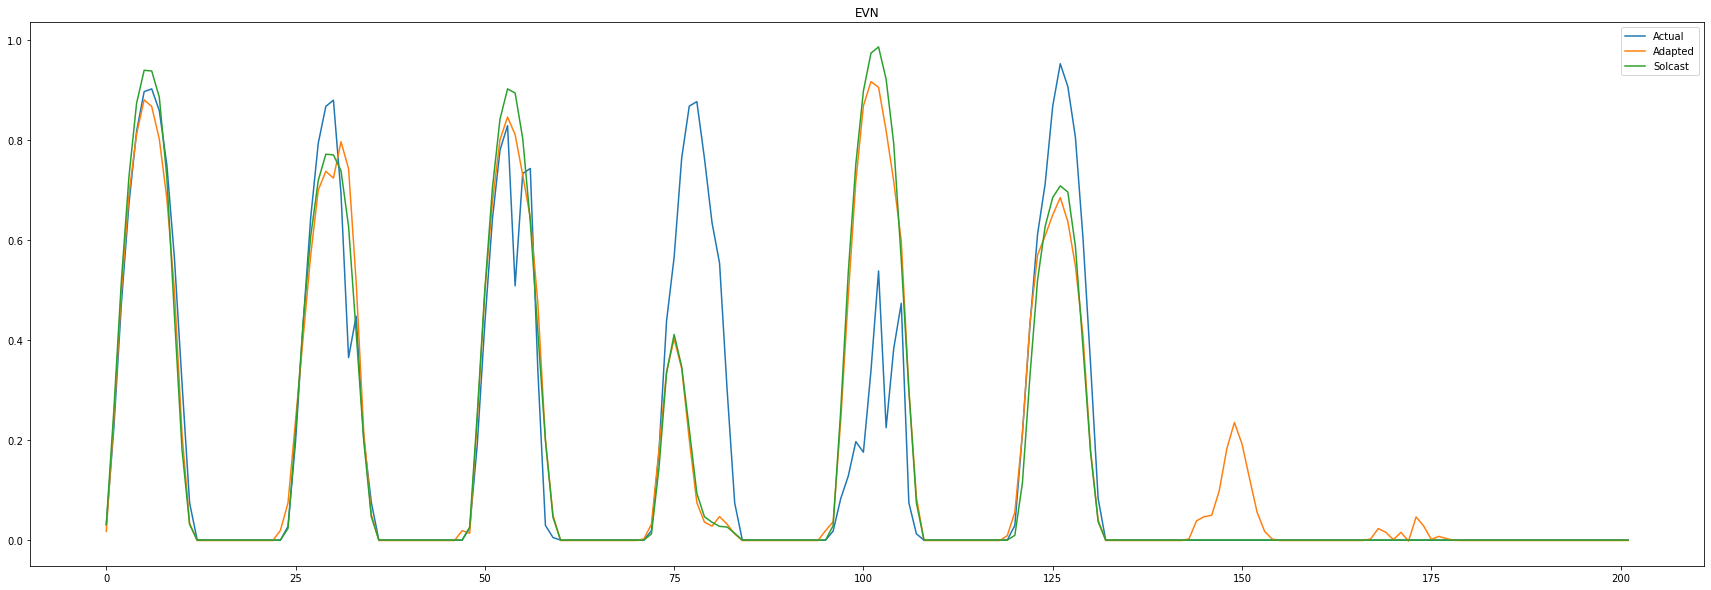

In [292]:
for k in range(3):
    plt.figure(figsize = (30,10))
    plt.plot(Y_test[:,k], label = 'Actual')
    plt.plot(pred[:,k], label = 'Adapted')
    plt.plot(X_test[:,k], label = 'Solcast')
    plt.title(var_list[k])
    plt.legend()

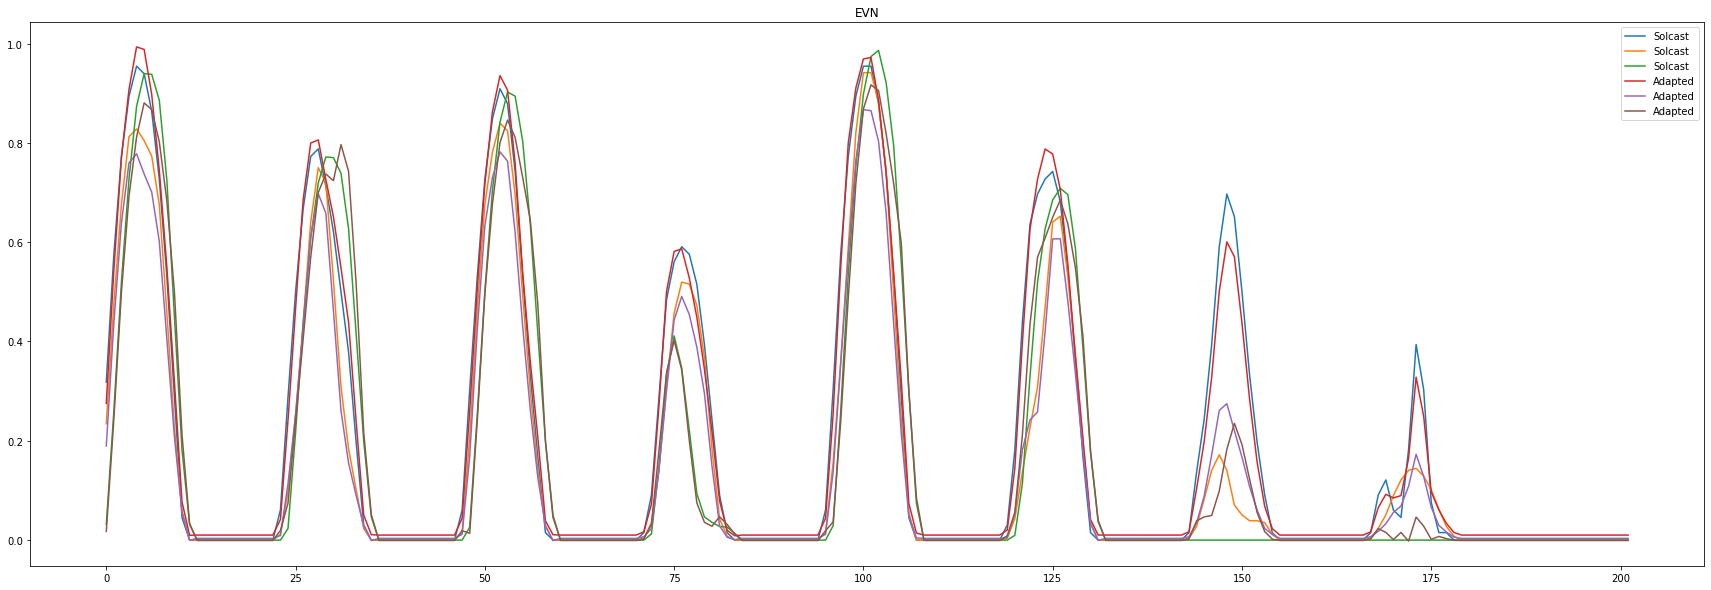

In [288]:
plt.figure(figsize = (30,10))
plt.plot(X_test, label = 'Solcast')
plt.plot(pred, label = 'Adapted')
plt.title(var_list[k])
plt.legend()

In [5]:
pgb = pd.read_csv('../data/pgb_nov.csv')

In [15]:
pgb.columns[1:-1]

Index(['TON-PV-AirPressure', 'TON-PV-Humidity',
       'TON-PV-PrecipitationIntensity', 'TON-PV-PrecipitationType',
       'TON-PV-Pyranometer', 'TON-PV-Temperature', 'TON-PV-Temperature1_Panel',
       'TON-PV-Temperature2_Panel', 'TON-PV-WindDirection',
       'TON-PV-WindSpeed'],
      dtype='object')

In [12]:
import sklearn.linear_model as lm

In [57]:
#some example data
x= np.linspace(0.1, 9.9, 1600,12)
y = 3.0 * x
#some confidence interval
ci = 1.96 * np.std(y)/np.mean(y)

fig, ax = plt.subplots()
ax.plot(x,y)
ax.fill_between(x, (y-ci), (y+ci), color='b', alpha=.1)

In [58]:
ci

1.1096677227895937

In [20]:
reg = lm.RidgeCV()

In [47]:
reg.fit(pgb['TON-PV-Pyranometer'].values.reshape(-1,1), pgb[pgb.columns[-1]])

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [45]:
pd.DataFrame(list(zip(reg.coef_,pgb[pgb.columns[1:-1]])))

0                              1
0 -0.215985             TON-PV-AirPressure
1 -0.220155                TON-PV-Humidity
2  9.024425  TON-PV-PrecipitationIntensity
3 -2.302312       TON-PV-PrecipitationType
4  0.582748             TON-PV-Pyranometer
5 -1.764985             TON-PV-Temperature
6  7.963166      TON-PV-Temperature1_Panel
7 -5.883706      TON-PV-Temperature2_Panel
8  0.001474           TON-PV-WindDirection
9  1.941640               TON-PV-WindSpeed

In [48]:
plt.plot(pgb[pgb.columns[-1]])
plt.plot(reg.predict(pgb['TON-PV-Pyranometer'].values.reshape(-1,1)))


In [50]:
reg.predict(pgb['TON-PV-Pyranometer'].values.reshape(-1,1))

array([  1.31507426,   1.31507426,   1.31507426,   1.31507426,
         1.31507426,   1.31507426,   1.31507426,   2.63278533,
        18.44531819,  34.91670659,  44.1406841 ,  44.79953963,
        32.94013999,  15.80989605,   2.63278533,   1.31507426,
         1.31507426,   1.31507426,   1.31507426,   1.31507426,
         1.31507426,   1.31507426,   1.31507426,   1.31507426,
         1.31507426,   1.31507426,   1.31507426,   1.31507426,
         1.31507426,   1.31507426,   1.31507426,   1.31507426,
         7.24477408,  24.37501802,  33.59899552,  21.73959587,
        23.71616248,   3.29164087,   1.31507426,   1.31507426,
         1.31507426,   1.31507426,   1.31507426,   1.31507426,
         1.31507426,   1.31507426,   1.31507426,   1.31507426,
         1.31507426,   1.31507426,   1.31507426,   1.31507426,
         1.31507426,   1.31507426,   1.31507426,   1.31507426,
         5.26820747,  17.78646266,  38.86983981,  65.88291679,
        34.25785106,  23.05730695,   4.60935194,   1.31

In [52]:
pgb[pgb.columns[-1]].values

array([  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   5.1,  21.7,
        37.5,  46.8,  48.1,  36.8,  19.9,   7.5,   1.2,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   1.4,  11. ,  28.3,  37.9,  25.9,
        27.5,  10.3,   6. ,   0.6,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   3.8,  10.5,  22.1,  42.6,  68.6,  37.9,  26.7,  10.4,
         2.6,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0.2,   8.3,  39.3,
        53.8,  42.4,  54.3,  43.8,  31. ,  11.1,   7.2,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   6.5,  32.2,  55.7,  80.3,  95.3,
       146.7,  59.7,  41.6,   6.8,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ])

In [4]:
scada = pd.read_csv('../data/scada.csv')

In [5]:
pv_data = pd.read_csv('../data/pv-data.csv')

In [6]:
pv_data['Date'] = pv_data['PeriodEnd'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ'))

In [7]:
scada['Date'] = scada['TON-PV-AirPressure - Time'].apply(lambda x: datetime.datetime.strptime(x, '%Y.%m.%d %H:%M:%S'))

In [8]:
scada

TON-PV-AirPressure - Time  TON-PV-AirPressure  TON-PV-Humidity  \
0          2020.09.17 02:00:00               996.0             84.1   
1          2020.09.17 03:00:00               996.0             84.6   
2          2020.09.17 04:00:00               996.0             84.6   
3          2020.09.17 05:00:00               996.0             89.9   
4          2020.09.17 06:00:00               997.0             90.7   
...                        ...                 ...              ...   
1651       2020.11.24 20:00:00              1008.0             73.7   
1652       2020.11.24 21:00:00              1008.0             75.3   
1653       2020.11.24 22:00:00              1008.0             78.3   
1654       2020.11.24 23:00:00              1008.0             80.1   
1655       2020.11.25 00:00:00              1008.0             82.5   

      TON-PV-PrecipitationIntensity  TON-PV-PrecipitationType  \
0                               0.0                       0.0   
1                               0.0                       0.0   
2                               0.0                       0.0   
3                               0.0                       0.0   
4                               0.0                       0.0   
...                             ...                       ...   
1651                            0.0                       0.0   
1652                            0.0                       0.0   
1653                            0.0                       0.0   
1654                            0.0                       0.0   
1655                            0.0                       0.0   

      TON-PV-Pyranometer  TON-PV-Temperature  TON-PV-Temperature1_Panel  \
0                    0.0               18.39                       17.2   
1                    0.0               17.92                       17.7   
2                    0.0               16.77                       16.2   
3                    0.0               15.75                       14.9   
4                   10.0               16.05                       16.1   
...                  ...                 ...                        ...   
1651                 0.0                6.13                        5.6   
1652                 0.0                5.58                        4.8   
1653                 0.0                5.01                        4.2   
1654                 0.0                4.38                        3.3   
1655                 0.0                3.64                        2.7   

      TON-PV-Temperature2_Panel  TON-PV-WindDirection  TON-PV-WindSpeed  \
0                          17.4                 250.0              2.27   
1                          17.9                 286.0              2.84   
2                          16.4                 274.0              1.95   
3                          15.1                 258.0              2.51   
4                          16.3                 289.0              4.03   
...                         ...                   ...               ...   
1651                        5.7                 245.0              4.97   
1652                        4.9                 244.0              4.71   
1653                        4.3                 240.0              4.72   
1654                        3.3                 235.0              4.41   
1655                        2.7                 222.0              3.18   

      power  Unnamed: 12  Unnamed: 13                Date  
0      0.04          NaN          NaN 2020-09-17 02:00:00  
1      0.04          NaN          NaN 2020-09-17 03:00:00  
2      0.04          NaN          NaN 2020-09-17 04:00:00  
3      0.04          NaN          NaN 2020-09-17 05:00:00  
4      0.04          NaN          NaN 2020-09-17 06:00:00  
...     ...          ...          ...                 ...  
1651   0.04          NaN          NaN 2020-11-24 20:00:00  
1652   0.04          NaN          NaN 2020-11-24 21:00:00  
1653   0.04          NaN     

In [9]:
pv_data.set_index('Date')[['Ghi', 'Ebh', 'Dni','Dhi']].resample('60T').sum()

Ghi  Ebh   Dni  Dhi
Date                                    
2020-11-13 12:00:00  257   31   108  226
2020-11-13 13:00:00   72    3    10   70
2020-11-13 14:00:00   36    1     6   35
2020-11-13 15:00:00    2    0     0    2
2020-11-13 16:00:00    0    0     0    0
...                  ...  ...   ...  ...
2020-11-25 05:00:00    0    0     0    0
2020-11-25 06:00:00    1    0     0    1
2020-11-25 07:00:00   90   31   178   60
2020-11-25 08:00:00  121   73   430   48
2020-11-25 09:00:00  437  300  1212  138

[286 rows x 4 columns]

In [21]:
pv_data['Date'] = pv_data['Date'] - datetime.timedelta(minutes = 60)

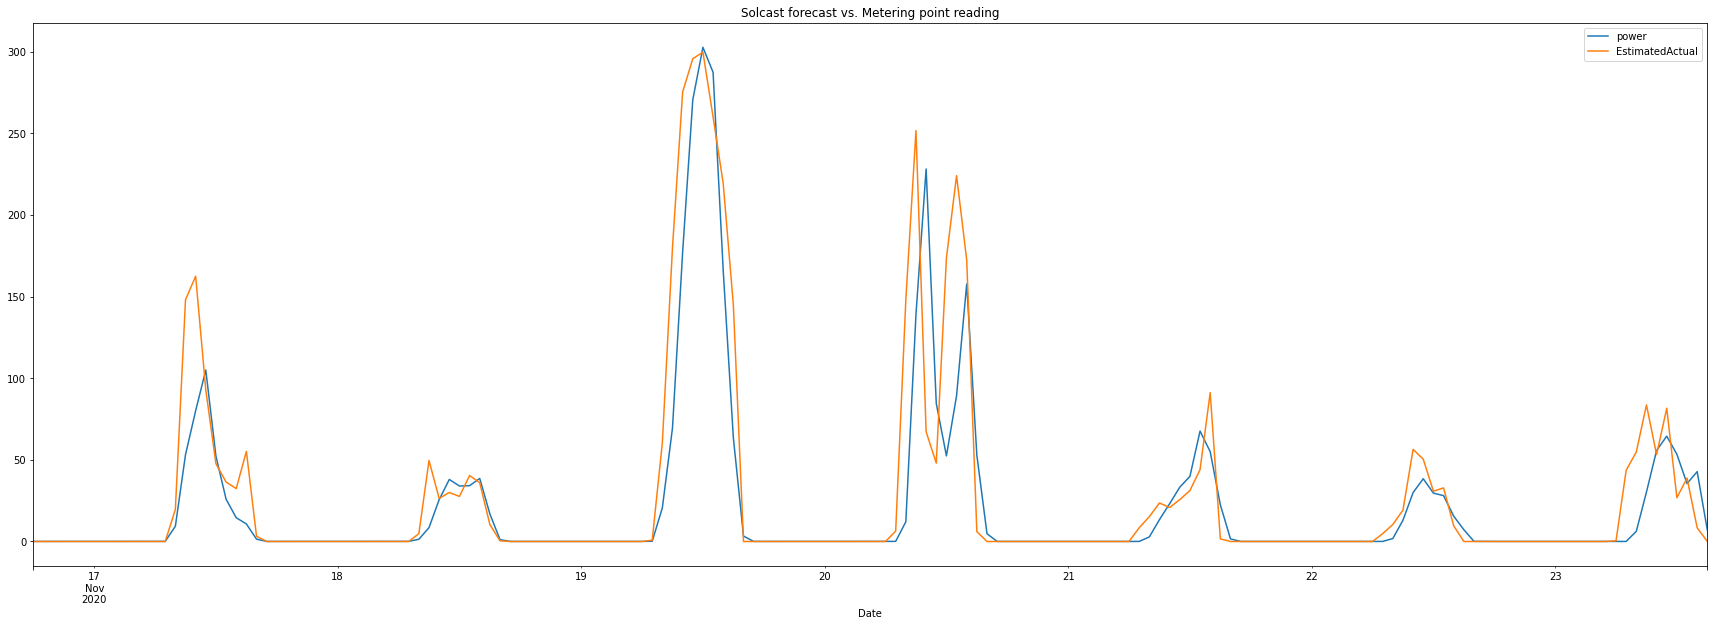

In [24]:
scada.merge(pv_data.set_index('Date')[['EstimatedActual']].dropna().resample('60T').mean() * 80, on = 'Date')[['power', 'EstimatedActual','Date']].plot(figsize = (30,10), x = 'Date', title = 'Solcast forecast vs. Metering point reading')

In [23]:
pv_data.set_index('Date')[['HourAheadForecast', 'EstimatedActual']].dropna().resample('60T').mean().max()

HourAheadForecast    3.745
EstimatedActual      3.745
dtype: float64

In [12]:
302.58/3.745

80.79572763684912

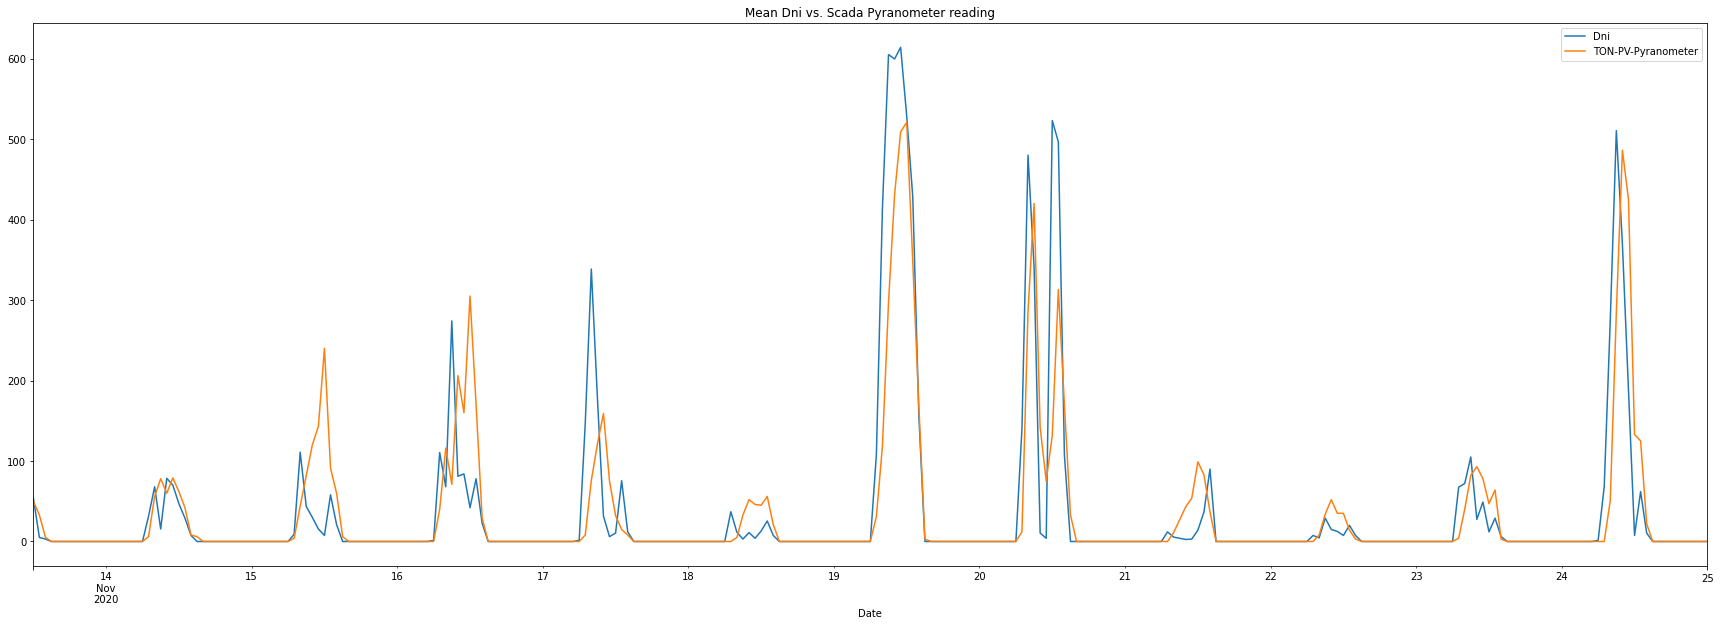

In [13]:
scada.merge(pv_data.set_index('Date')[['Ghi', 'Ebh', 'Dni','Dhi']].resample('60T').mean(), on = 'Date')[['Dni','TON-PV-Pyranometer','Date']].plot(figsize = (30,10), x = 'Date', title = 'Mean Dni vs. Scada Pyranometer reading')

In [25]:
scada.merge(pv_data.set_index('Date')[['Ghi', 'Ebh', 'Dni','Dhi']].resample('60T').sum(), on = 'Date')[['Ebh','TON-PV-Pyranometer','Date']].plot(figsize = (30,10), x = 'Date', title = 'Sum Ghi vs. Scada Pyranometer reading')